# Human Body Temp

## <span style="color:red">Question of Interest: </span>
## <span style="color:red"> What is the true normal human body temperature? </span>

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv('F:/DATA ANALYST/MINI-PROJECT/data/human_body_temperature.csv')

### QUESTION #1: Is the distribution of body temperatures normal? 

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


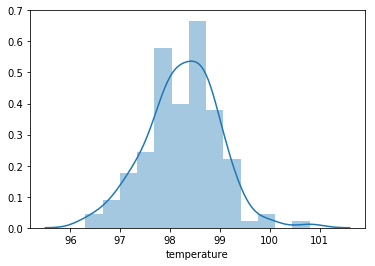

In [3]:
ax = sns.distplot(df['temperature'])

In [4]:
# conduct normal test
from scipy.stats import normaltest
statistic, p_val = normaltest(df['temperature'])

print('chi-square statistic:',statistic)
print('p value =',p_val)

chi-square statistic: 2.703801433319203
p value = 0.2587479863488254


In [5]:
# conduct hypothesis test
alpha = 0.05
if p_val < alpha:
    print("The null hypothesis - that the data comes from a normal distribution - can be rejected")
else:
    print("The null hypothesis - that the data comes from a normal distribution - cannot be rejected")

The null hypothesis - that the data comes from a normal distribution - cannot be rejected


### <span style="color:red"> ANSWER #1: Yes, the distribution appears to be normally distributed (p-value = 0.259)</span>

### QUESTION #2: Is the sample size large? Are the observations independent?

In [55]:
# test CLT's 1st condition: sample size
if len(df) < 30:
    print("The sample size is too small (n < 30)")
else:
    print("The sample size is large (n > 30)")

The sample size is large (n > 30)


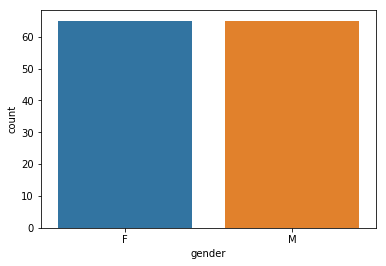

In [56]:
sns.countplot(df['gender'])

#### NOTE: without unique observation ID's, it's difficult to determine independence, but we will proceed forward with the assumption nontheless

### <span style="color:red"> ANSWER #2: Yes, the sample size is large (n > 30) and observations are assumed to be independent</span>

### QUESTION #3: Is the true population mean really 98.6 degrees F?

#### <span style="color:green">WHY ONE-SAMPLE TEST: we're comparing one type of samples (temperature) to a single, known population mean</span>
#### <span style="color:green">WHY T-TEST: population standard deviation is unknown</span

In [57]:
# conduct one-sample t-test (justification above)
from scipy.stats import ttest_1samp
t_stat, p_val_t = ttest_1samp(df['temperature'], 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

('t-statistic:', -5.4548232923645195)
('p value =', 2.4106320415561276e-07)


In [58]:
# CURIOUS TEST: conduct one-sample z-test
from statsmodels.stats.weightstats import ztest
z_stat, p_val_z = ztest(x1= df['temperature'], value = 98.6)

print('z-statistic:',z_stat)
print('p value =',p_val_z)

('z-statistic:', -5.4548232923645195)
('p value =', 4.9021570141012155e-08)


In [59]:
# conduct hypothesis test for t-score
alpha = 0.05
if p_val_t < alpha:
    print("The null hypothesis - that the true population mean is 98.6 degrees F - can be rejected")
else:
    print("The null hypothesis - that the true population mean is 98.6 degrees F - cannot be rejected")

The null hypothesis - that the true population mean is 98.6 degrees F - can be rejected


### <span style="color:red"> ANSWER #3: No, the true population mean appears to be different than 98.6 degrees (p-value = 2.4 e-07)</span>

### QUESTION #4: Repeat both z-test & t-test for a sample of size 10 from the data. Which is the correct one to use? 

In [60]:
# generate random sample
sample = np.random.choice(df['temperature'], size=10)

In [61]:
# conduct one-sample t-test
t_stat, p_val_t = ttest_1samp(sample, 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

('t-statistic:', -2.5107583277980736)
('p value =', 0.033269333890927198)


In [62]:
# CURIOUS TEST: conduct one-sample z-test
z_stat, p_val_z = ztest(x1= sample, value = 98.6)

print('z-statistic:',z_stat)
print('p value =',p_val_z)

('z-statistic:', -2.5107583277980736)
('p value =', 0.012047214094547912)


### <span style="color:red">ANSWER #5: The z-test was significant (p-val < 0.05) while the t-test was not. The t-test is appropiate to use here because we're pulling from a population (the dataset) who's standard deviation is known. </span>

### QUESTION #6: At what temperature should we consider someone's temperature to be "abnormal"?

In [63]:
# calculate 95% confidence interval
from scipy import stats
conf_int = stats.norm.interval(alpha=0.95, loc=np.mean(df['temperature']), scale=np.std(df['temperature']))

print('95% confidence interval:',conf_int)

('95% confidence interval:', (96.81775582674824, 99.680705711713316))


### <span style="color:red">ANSWER #6: We can consider a temperature to be "abnormal" if it is less than 96.81 or greater than 99.68</span>

### QUESTION #7: Is there a significant difference between males and females in normal temperature?

#### <span style="color:green">WHY TWO-SAMPLE TEST: we're comparing the difference of two quantities</span>
#### <span style="color:green">WHY T-TEST: population standard deviation is unknown</span

In [64]:
# get male and female temperature scores
male_temps = df[df['gender'] == 'M'].temperature
female_temps = df[df['gender'] == 'F'].temperature

In [65]:
# conduct two-sample t-test (justification above)
from scipy.stats import ttest_ind
t_stat, p_val_t = ttest_ind(male_temps, female_temps)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

('t-statistic:', -2.2854345381656103)
('p value =', 0.023931883122395609)


In [66]:
# conduct hypothesis test
alpha = 0.05
if p_val_t < alpha:
    print("The null hypothesis - that there is no difference between male and female temperatures - can be rejected")
else:
    print("The null hypothesis - that there is no difference between male and female temperatures - cannot be rejected")

The null hypothesis - that there is no difference between male and female temperatures - can be rejected


### <span style="color:red">ANSWER #7: Yes, the difference in male and female body temperatures is statistically significant.</span>

## <span style="color:teal">Analysis Conclusion:</span>
### <span style="color:teal"> 1) All in all, it appears that the true normal human body temperature varies from 98.6 degrees fahreneheight.</span>
### <span style="color:teal"> 2) Moreover, normal body temperature varies across a gaussian distribution and should only be considered "abnormal" if it varies outside the range of 96.81-99.68.</span>
### <span style="color:teal"> 3) Finally, there's evidence in the data that there is a statistically significant difference between males and females in normal body temperature.</span>